In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


Epoch 1/1000
211/211 [==============================] - 2s 4ms/step - loss: 6857.0957 - val_loss: 759.3474
Epoch 2/1000
211/211 [==============================] - 1s 3ms/step - loss: 536.5002 - val_loss: 291.3291
Epoch 3/1000
211/211 [==============================] - 1s 4ms/step - loss: 187.2300 - val_loss: 208.1894
Epoch 4/1000
211/211 [==============================] - 1s 3ms/step - loss: 136.6379 - val_loss: 207.7586
Epoch 5/1000
211/211 [==============================] - 1s 3ms/step - loss: 108.2236 - val_loss: 155.0444
Epoch 6/1000
211/211 [==============================] - 1s 3ms/step - loss: 92.5219 - val_loss: 129.1106
Epoch 7/1000
211/211 [==============================] - 1s 3ms/step - loss: 76.7326 - val_loss: 137.2812
Epoch 8/1000
211/211 [==============================] - 1s 3ms/step - loss: 68.8751 - val_loss: 104.6738
Epoch 9/1000
211/211 [==============================] - 1s 3ms/step - loss: 59.9321 - val_loss: 99.1172
Epoch 10/1000
211/211 [===========================

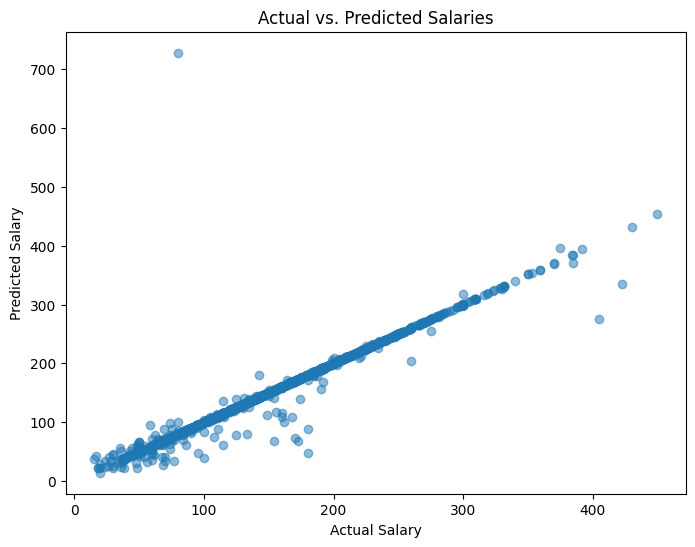

Mean Absolute Error: 2.089520127598708
Mean Squared Error: 299.19271386892586
Root Mean Squared Error: 17.29718803357719
Top 10 Features: Index(['job_title_Data Visualization Analyst', 'job_title_ETL Engineer',
       'job_title_Data DevOps Engineer', 'job_title_Data Specialist',
       'job_title_AI Engineer', 'job_title_Business Intelligence Analyst',
       'job_title_BI Data Analyst', 'job_title_Principal Data Analyst',
       'job_title_Lead Machine Learning Engineer',
       'job_title_Consultant Data Engineer'],
      dtype='object')


In [7]:

# Load the data
data = pd.read_csv('jobs_in_data.csv')

# Drop the 'salary_in_usd' column since we're ignoring it
# data.drop(columns=['salary_in_usd'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data)
# Divide the 'salary' column by 1000
data['salary_in_usd'] /= 1000
# Separate features and target
X = data.drop(columns=['salary'])
y = data['salary_in_usd']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     # Dropout(0.2),
#     Dense(64, activation='relu'),
#     # Dropout(0.2),
#     Dense(1, activation='linear')
# ])
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.2),  # Adding dropout regularization
    Dense(64, activation='relu'),
    # Dropout(0.2),  # Adding dropout regularization
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model with a custom learning rate
# custom_learning_rate = 0.001  # Set your desired learning rate here
# model.compile(optimizer=Adam(learning_rate=custom_learning_rate), loss='mean_squared_error')
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)

# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Feature Importance
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate the importance of features based on the weights
feature_importance = np.mean(np.abs(weights), axis=0)

# Get feature names
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Top 10 features
top_features = feature_names[sorted_indices][:10]
print('Top 10 Features:', top_features)

 2813702912.0 0.001
 2603507200.0 0.01
 3033694464.0 0.1
 2603507017.888839 0.01

 1000 epoch
 2596519395.2590485
root 50956.05356833522


59/59 [==============================] - 0s 2ms/step


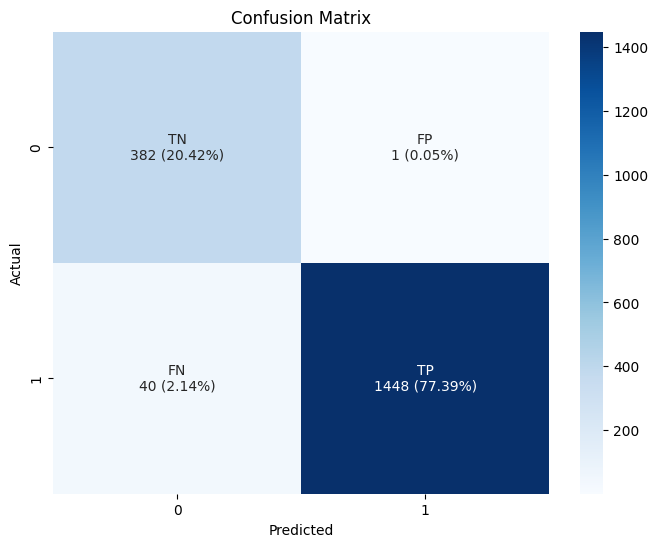

Accuracy: 0.9780865847140566
Precision: 0.9993098688750862
Recall: 0.9731182795698925


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

# Make predictions on the scaled test set
predictions_scaled = model.predict(X_test_scaled)

# Convert predictions back to original scale
predictions = predictions_scaled.flatten()

# Define thresholds for classification
threshold_positive = 100  # Define a suitable threshold based on your problem

# Classify predictions into two categories based on the threshold
y_test_class = (y_test >= threshold_positive)
predictions_class = (predictions >= threshold_positive)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_class, predictions_class)

# Calculate percentages
total = np.sum(conf_matrix)
percentages = (conf_matrix / total) * 100

# Define labels for each cell with amount, percentage, and the type of classification
labels = np.empty_like(conf_matrix, dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i == 0 and j == 0:  # True Negative
            labels[i, j] = f"TN\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"
        elif i == 0 and j == 1:  # False Positive
            labels[i, j] = f"FP\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"
        elif i == 1 and j == 0:  # False Negative
            labels[i, j] = f"FN\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"
        else:  # True Positive
            labels[i, j] = f"TP\n{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)"

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy, precision, and recall
accuracy = accuracy_score(y_test_class, predictions_class)
precision = precision_score(y_test_class, predictions_class)
recall = recall_score(y_test_class, predictions_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
